# Codes

In [3]:
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
import numpy as np
import networkx as nx


COLOR_LIST = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'hotpink', 'gray', 'steelblue', 'olive']
PLOT_FIGURE_SIZE = (5, 5)
BIG_PLOT_FIGURE_SIZE = (5, 5)
# BIG_PLOT_FIGURE_SIZE = (10, 10)

def show_num_condition(label: int):
  if label % 10 == 0:
    return True
  # elif label % 10 == 1:
  #   return True
  # elif label % 10 == 5:
  #   return True
  else:
    return False

def choose_size(num_embs):
  if num_embs <= 30:
    return PLOT_FIGURE_SIZE
  else:
    return BIG_PLOT_FIGURE_SIZE

def plot_num_position_in_two_dim_repr(num_z, num_labels, x_limit=None, y_limit=None, all_embs=None, is_legend=False, save_path=None, is_adjust_position=False):
    figure_size = choose_size(len(num_z))
    plt.figure(figsize=figure_size)
    assert len(num_z[0]) == 2, f"The representation dimension of a number should be two, but got {len(num_z[0])} instead."
    sorted_label = sorted(num_labels)
    sorted_indices = [i[0] for i in sorted(enumerate(num_labels), key=lambda x: x[1])]
    sorted_num_z = [num_z[i] for i in sorted_indices]
    if is_adjust_position:
        G = nx.Graph()
        for i in range(len(num_z)):
            G.add_node(i, pos=sorted_num_z[i])
        pos = nx.spring_layout(G, pos={i: sorted_num_z[i] for i in range(len(num_z))}, iterations=1, scale=0.0001)
        sorted_num_z = np.array([pos[i] for i in range(len(num_z))])
    X = [item[0] for item in sorted_num_z]
    Y = [item[1] for item in sorted_num_z]
    
       
    max_repeating_num = find_most_frequent_elements_repeating_num(num_labels)
    for i in range(0, len(num_z)):
        plt.scatter(X[i], Y[i],
                    marker=f'${sorted_label[i]}$' if (show_num_condition(sorted_label[i]) or len(num_z) <= 30) else "o",
                    s=get_mark_size(sorted_label[i], 1) if (show_num_condition(sorted_label[i]) or len(num_z) <= 30) else 18,
                    # alpha=min(1, 1/max_repeating_num*1.3),
                    alpha=0.7,
                    c=COLOR_LIST[sorted_label[i] % len(COLOR_LIST)],
                    # facecolors='none',
                    # edgecolors=COLOR_LIST[sorted_label[i] % len(COLOR_LIST)],
                    # linewidths=1.2,
                    label=f'{sorted_label[i] % 10} mod 10' if sorted_label[i] <=10 and not show_num_condition(sorted_label[i]) else None
                    )
    plt.plot(X, Y, linestyle='dashed', linewidth=0.5)
    if all_embs is not None:
        embs_x = [item[0] for item in all_embs]
        embs_y = [item[1] for item in all_embs]
        plt.scatter(embs_x, embs_y, marker='o', s=1, c='navy')
    plt.xticks([])
    plt.yticks([])

    # plt.xlabel('t-SNE Dimension 1', fontsize=24)
    # plt.yticks(fontsize=14)
    # plt.ylabel('t-SNE Dimension 2', fontsize=24)
    # plt.tight_layout()

    if is_legend:
        plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.55, 1.0))
        # plt.legend(fontsize=12)
    
    
    # if x_limit is not None:
    #     plt.xlim(x_limit[0], x_limit[1])
    # if y_limit is not None:
    #     plt.ylim(y_limit[0], y_limit[1])
    # if x_limit is None and y_limit is None:
    #     plt.axis('equal')

    # update names for different figure
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', format="pdf", dpi=600)
    plt.show()




def find_most_frequent_elements_repeating_num(arr):
    nd_array = np.array(arr)
    unique_elements, counts = np.unique(nd_array, return_counts=True)
    max_count = np.max(counts)
    return max_count



def get_mark_size(i, zoomer=1):
  if i < 10:
    return int(200 * zoomer)
  elif i < 100:
    return int(200 * zoomer)
  elif i < 1000:
    return int(350 * zoomer)
  else:
    return int(100 * zoomer)


def plot_num_position_in_three_dim_repr(num_z, num_labels, result_path=None, x_limit=None, y_limit=None, all_embs=None):
    fig = plt.figure(figsize = choose_size(len(num_z)))
    ax = fig.add_subplot(111, projection='3d')
    assert len(num_z[0]) == 3, f"The representation dimension of a number should be three, but got {len(num_z[0])} instead."
    sorted_label = sorted(num_labels)
    sorted_indices = [i[0] for i in sorted(enumerate(num_labels), key=lambda x: x[1])]
    sorted_num_z = [num_z[i] for i in sorted_indices]
    X = [item[0] for item in sorted_num_z]
    Y = [item[1] for item in sorted_num_z]
    Z = [item[2] for item in sorted_num_z]
    max_repeating_num = find_most_frequent_elements_repeating_num(num_labels)
    for i in range(0, len(num_z)):
        ax.scatter(X[i], Y[i], Z[i],
                    marker=f'${sorted_label[i]}$' if sorted_label[i] % 10==0 else "o",
                    s=get_mark_size(sorted_label[i], 0.7) if sorted_label[i] % 10==0 else 1,
                    alpha=min(1, 1/max_repeating_num*1.3),
                    c=COLOR_LIST[sorted_label[i] % len(COLOR_LIST)])
    plt.plot(X, Y, Z, linestyle='dashed', linewidth=0.5)
    if all_embs is not None:
        embs_x = [item[0] for item in all_embs]
        embs_y = [item[1] for item in all_embs]
        embs_z = [item[2] for item in all_embs]
        ax.scatter(embs_x, embs_y, embs_z, marker='o', s=1, c='navy')
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    if x_limit is not None:
        ax.set_xlim(x_limit)
    if y_limit is not None:
        ax.set_ylim(y_limit)
    if result_path is None:
        plt.show()
    else:
        # plt.savefig(f'{result_path}.png')
        plt.savefig(f'{result_path}.pdf', bbox_inches='tight', format="pdf", dpi=600)
        plt.cla()
        plt.clf()
        plt.close()

# All files

In [ ]:
import json
import pandas as pd
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from metrics import nearest_neighbor_analysis
from sklearn.manifold import TSNE

import torch
import os

PLOT_SAVE_ROOT = 'plot'
TOKEN_METHOD = 'mean'
LAYER_TENSOR_ROOT = f'outputs_{TOKEN_METHOD}/embeddings'
layer_json_files = os.listdir(LAYER_TENSOR_ROOT)
for i in range(len(layer_json_files)):
  print(f'{i}: {layer_json_files[i]}')


def load_tensor(tensor_file, token_method='mean'):
  print(f"loading {tensor_file}")
  tensor_root = f'outputs_{token_method}/embeddings'
  tensor = torch.load(os.path.join(tensor_root, tensor_file))
  print(f"tensor shape: {tensor.shape}")
  # Check if the item in the tensor is already a numpy array
  # If it is, directly append it to the list
  # Otherwise, convert it to a numpy array using .cpu().numpy() for GPU tensors or .numpy() for CPU tensors
  layer_embs = np.array([item if isinstance(item, np.ndarray) else item.cpu().numpy() if item.is_cuda else item.numpy() for item in tensor])
  if len(layer_embs.shape) == 2:
    layer_embs = np.expand_dims(layer_embs, axis=0)
  print(f"Emb shape: {layer_embs.shape}")
  return layer_embs
        
def get_embs_labels(layer_embs, labels, layer_idx=0, gap=1, last_idx=-1, idx_list=None, plot_func=None):
  if idx_list is not None:
    selected_layer_embs = layer_embs[layer_idx][idx_list]
    selected_labels = labels[idx_list]
    return selected_layer_embs, selected_labels
  if last_idx == -1:
    last_idx = len(layer_embs[layer_idx])
  gapped_embs = layer_embs[layer_idx][::gap]
  gapped_labels = labels[::gap]
  print(f"embs length: {len(gapped_embs)}")
  print(f"examples: {gapped_labels[:5]}")
  return gapped_embs[:last_idx], gapped_labels[:last_idx]

def dimension_reduction_test(dr_func, vectors, labels, plot_func=None):
  np_vectors = np.array(vectors)
  orderness_1 = nearest_neighbor_analysis(np_vectors, labels)
  # transformed_vectors = dr_func(np_vectors, n_components)
  transformed_vectors = dr_func.fit_transform(vectors)
  # if is_plot:
  #   plot_num_position_in_two_dim_repr(transformed_vectors, labels)
  # transformed_vectors = pow_extend_vectors(transformed_vectors, labels, 1.01)
  orderness_2 = nearest_neighbor_analysis(transformed_vectors, labels)
  print(f"Func name: {dr_func.__class__.__name__}")
  print(f"Orderness before dimension reduction: {orderness_1}")
  print(f"Orderness after dimension reduction: {orderness_2}")
  if plot_func is not None:
      plot_func(transformed_vectors, labels)
      # plot_num_position_in_two_dim_repr(transformed_vectors, labels)
  print(f"\n")


0: llama3.1-8b.forgetdifference_single.pt
1: Qwen2.5-7B.nocontext_single.pt
2: opt-13b.nocontext_single.pt
3: llama3.1-8b.nocontext_single.pt
4: gemma2-9b.nocontext_single.pt
5: gpt-j-6B.nocontext_single.pt
6: llama2-7b.nocontext_single.pt
7: mistral-7B.forgetdifference_single.pt
8: mistral-7B.nocontext_single.pt
9: Phi3.5-4b.meditation_single.pt
10: Qwen2.5-7B.forgetdifference_single.pt
11: Phi3.5-4b.forgetdifference_single.pt
12: gemma2-9b.meditation_single.pt
13: Phi3.5-4b.nocontext_single.pt
14: mistral-7B.meditation_single.pt
15: gpt2.nocontext_single.pt
16: llama3.1-8b.meditation_single.pt
17: Qwen2.5-7B.meditation_single.pt


## Phi3.5-4b.layer-3

loading Phi3.5-4b.nocontext_single.pt
tensor shape: (33, 201, 3072)
Emb shape: (33, 201, 3072)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.1025
Layer 1:
orderness: 0.1125
Layer 2:
orderness: 0.715
Layer 3:
orderness: 0.89
Layer 4:
orderness: 0.8625
Layer 5:
orderness: 0.8575
Layer 6:
orderness: 0.8125
Layer 7:
orderness: 0.77
Layer 8:
orderness: 0.7225
Layer 9:
orderness: 0.6275
Layer 10:
orderness: 0.5775
Layer 11:
orderness: 0.5525
Layer 12:
orderness: 0.5375
Layer 13:
orderness: 0.5175
Layer 14:
orderness: 0.5325
Layer 15:
orderness: 0.5175
Layer 16:
orderness: 0.5
Layer 17:
orderness: 0.495
Layer 18:
orderness: 0.45
Layer 19:
orderness: 0.5
Layer 20:
orderness: 0.515
Layer 21:
orderness: 0.4825
Layer 22:
orderness: 0.4675
Layer 23:
orderness: 0.4525
Layer 24:
orderness: 0.45
Layer 25:
orderness: 0.4325
Layer 26:
orderness: 0.415
Layer 27:
orderness: 0.415
Layer 28:
orderness: 0.4125
Layer 29:
orderness: 0.41
Layer 30:
orderness: 0.4075
Layer 31:
orderness: 0.4075
L

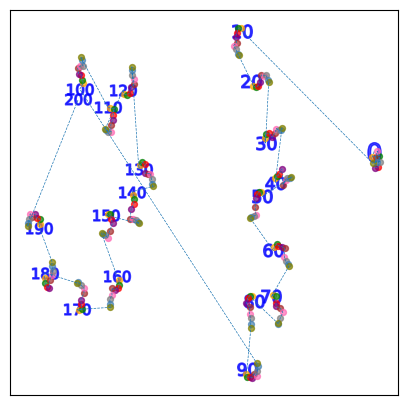

In [4]:
TENSOR_FILE = 'Phi3.5-4b.nocontext_single.pt'
LAYER_IDX = 3
IS_LEGNED = False


START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=10, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

## llama3.1-8b.nocontext_single.pt

loading llama3.1-8b.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.85
Layer 1:
orderness: 0.9125
Layer 2:
orderness: 0.9125
Layer 3:
orderness: 0.805
Layer 4:
orderness: 0.81
Layer 5:
orderness: 0.7575
Layer 6:
orderness: 0.69
Layer 7:
orderness: 0.6575
Layer 8:
orderness: 0.645
Layer 9:
orderness: 0.65
Layer 10:
orderness: 0.6525
Layer 11:
orderness: 0.61
Layer 12:
orderness: 0.68
Layer 13:
orderness: 0.73
Layer 14:
orderness: 0.79
Layer 15:
orderness: 0.83
Layer 16:
orderness: 0.83
Layer 17:
orderness: 0.81
Layer 18:
orderness: 0.8125
Layer 19:
orderness: 0.775
Layer 20:
orderness: 0.73
Layer 21:
orderness: 0.73
Layer 22:
orderness: 0.7275
Layer 23:
orderness: 0.7075
Layer 24:
orderness: 0.68
Layer 25:
orderness: 0.6625
Layer 26:
orderness: 0.6525
Layer 27:
orderness: 0.6325
Layer 28:
orderness: 0.6325
Layer 29:
orderness: 0.6175
Layer 30:
orderness: 0.5925
Layer 31:
orderness: 0.5625
Layer 32:

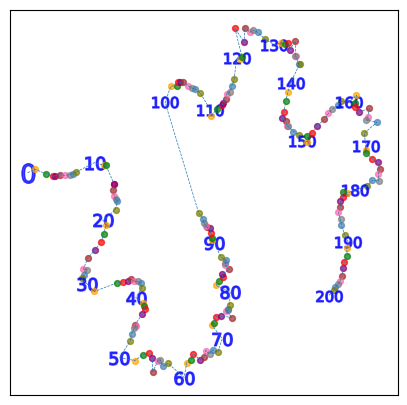

In [11]:
TENSOR_FILE = 'llama3.1-8b.nocontext_single.pt'
LAYER_IDX = 1
IS_LEGNED = False

START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=120, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

## mistral-7B.nocontext_single.pt

loading mistral-7B.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.1225
Layer 1:
orderness: 0.78
Layer 2:
orderness: 0.8625
Layer 3:
orderness: 0.845
Layer 4:
orderness: 0.8325
Layer 5:
orderness: 0.8075
Layer 6:
orderness: 0.795
Layer 7:
orderness: 0.78
Layer 8:
orderness: 0.7275
Layer 9:
orderness: 0.7
Layer 10:
orderness: 0.685
Layer 11:
orderness: 0.655
Layer 12:
orderness: 0.665
Layer 13:
orderness: 0.68
Layer 14:
orderness: 0.6875
Layer 15:
orderness: 0.71
Layer 16:
orderness: 0.71
Layer 17:
orderness: 0.7175
Layer 18:
orderness: 0.685
Layer 19:
orderness: 0.6725
Layer 20:
orderness: 0.6425
Layer 21:
orderness: 0.635
Layer 22:
orderness: 0.6125
Layer 23:
orderness: 0.605
Layer 24:
orderness: 0.6025
Layer 25:
orderness: 0.5725
Layer 26:
orderness: 0.5775
Layer 27:
orderness: 0.58
Layer 28:
orderness: 0.555
Layer 29:
orderness: 0.5575
Layer 30:
orderness: 0.58
Layer 31:
orderness: 0.58
Layer 3

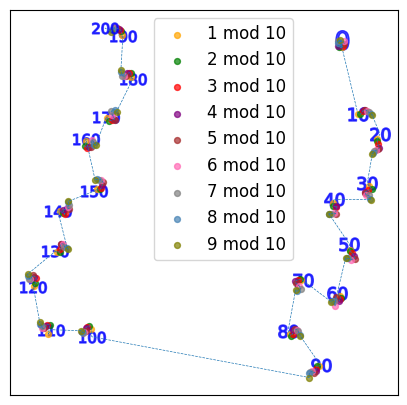

In [10]:
TENSOR_FILE = 'mistral-7B.nocontext_single.pt'
LAYER_IDX = 2
IS_LEGNED = True
PERPLEXITY = 16

START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=PERPLEXITY, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

## Qwen2.5-7B.nocontext_single.pt

loading Qwen2.5-7B.nocontext_single.pt
tensor shape: (29, 201, 3584)
Emb shape: (29, 201, 3584)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.105
Layer 1:
orderness: 0.6275
Layer 2:
orderness: 0.72
Layer 3:
orderness: 0.7275
Layer 4:
orderness: 0.6875
Layer 5:
orderness: 0.64
Layer 6:
orderness: 0.605
Layer 7:
orderness: 0.6425
Layer 8:
orderness: 0.705
Layer 9:
orderness: 0.6675
Layer 10:
orderness: 0.66
Layer 11:
orderness: 0.655
Layer 12:
orderness: 0.64
Layer 13:
orderness: 0.6275
Layer 14:
orderness: 0.655
Layer 15:
orderness: 0.655
Layer 16:
orderness: 0.65
Layer 17:
orderness: 0.6525
Layer 18:
orderness: 0.6425
Layer 19:
orderness: 0.6325
Layer 20:
orderness: 0.6025
Layer 21:
orderness: 0.6225
Layer 22:
orderness: 0.6175
Layer 23:
orderness: 0.6125
Layer 24:
orderness: 0.5725
Layer 25:
orderness: 0.54
Layer 26:
orderness: 0.52
Layer 27:
orderness: 0.49
Layer 28:
orderness: 0.43
Func name: TSNE
Orderness before dimension reduction: 0.7275
Orderness after dimension 

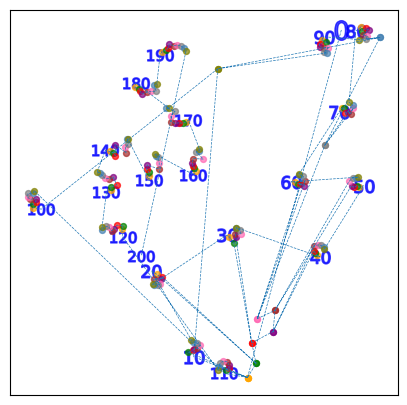

In [9]:
TENSOR_FILE = 'Qwen2.5-7B.nocontext_single.pt'
LAYER_IDX = 3
IS_LEGNED = False
PERPLEXITY = 17

START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=PERPLEXITY, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

## llama2-7b.nocontext_single.pt

loading llama2-7b.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.095
Layer 1:
orderness: 0.2775
Layer 2:
orderness: 0.4325
Layer 3:
orderness: 0.8175
Layer 4:
orderness: 0.8225
Layer 5:
orderness: 0.7825
Layer 6:
orderness: 0.7525
Layer 7:
orderness: 0.74
Layer 8:
orderness: 0.72
Layer 9:
orderness: 0.685
Layer 10:
orderness: 0.675
Layer 11:
orderness: 0.6475
Layer 12:
orderness: 0.665
Layer 13:
orderness: 0.68
Layer 14:
orderness: 0.69
Layer 15:
orderness: 0.635
Layer 16:
orderness: 0.64
Layer 17:
orderness: 0.635
Layer 18:
orderness: 0.6075
Layer 19:
orderness: 0.5675
Layer 20:
orderness: 0.55
Layer 21:
orderness: 0.53
Layer 22:
orderness: 0.52
Layer 23:
orderness: 0.515
Layer 24:
orderness: 0.525
Layer 25:
orderness: 0.5125
Layer 26:
orderness: 0.5125
Layer 27:
orderness: 0.5025
Layer 28:
orderness: 0.5375
Layer 29:
orderness: 0.5375
Layer 30:
orderness: 0.5275
Layer 31:
orderness: 0.53
Layer 

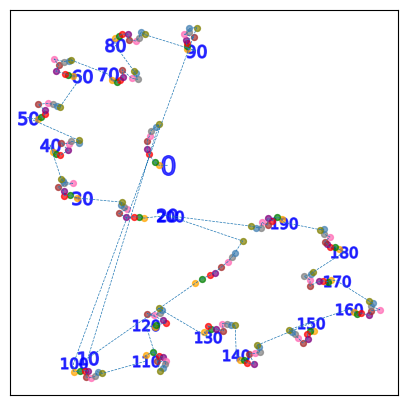

In [8]:
TENSOR_FILE = 'llama2-7b.nocontext_single.pt'
LAYER_IDX = 4
IS_LEGNED = False
PERPLEXITY = 18

START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=PERPLEXITY, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

## gemma2-9b.nocontext_single.pt

loading gemma2-9b.nocontext_single.pt
tensor shape: (43, 201, 3584)
Emb shape: (43, 201, 3584)
embs length: 201
examples: [0 1 2 3 4]
Layer 0:
orderness: 0.145
Layer 1:
orderness: 0.2175
Layer 2:
orderness: 0.3825
Layer 3:
orderness: 0.82
Layer 4:
orderness: 0.86
Layer 5:
orderness: 0.855
Layer 6:
orderness: 0.835
Layer 7:
orderness: 0.8125
Layer 8:
orderness: 0.7625
Layer 9:
orderness: 0.72
Layer 10:
orderness: 0.6725
Layer 11:
orderness: 0.6425
Layer 12:
orderness: 0.6525
Layer 13:
orderness: 0.6575
Layer 14:
orderness: 0.6375
Layer 15:
orderness: 0.6325
Layer 16:
orderness: 0.61
Layer 17:
orderness: 0.6
Layer 18:
orderness: 0.6075
Layer 19:
orderness: 0.585
Layer 20:
orderness: 0.5875
Layer 21:
orderness: 0.595
Layer 22:
orderness: 0.605
Layer 23:
orderness: 0.6125
Layer 24:
orderness: 0.6
Layer 25:
orderness: 0.585
Layer 26:
orderness: 0.55
Layer 27:
orderness: 0.59
Layer 28:
orderness: 0.665
Layer 29:
orderness: 0.655
Layer 30:
orderness: 0.615
Layer 31:
orderness: 0.5875
Layer 32

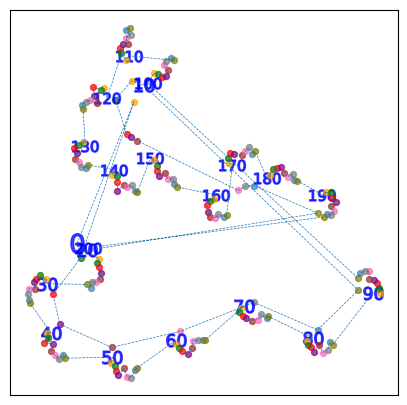

In [7]:
TENSOR_FILE = 'gemma2-9b.nocontext_single.pt'
LAYER_IDX = 5
IS_LEGNED = False
PERPLEXITY = 12

START_IDX = 0
END_IDX = 1001
# START_IDX = 200
# END_IDX = 401

layer_embs = load_tensor(TENSOR_FILE)
embs_len = min(len(layer_embs[0]), END_IDX - START_IDX)
last_idx = START_IDX + embs_len
FIG_NAME = f"tSNE.{TENSOR_FILE.split('.pt')[0]}-{LAYER_IDX}-{TOKEN_METHOD}-{START_IDX}_{last_idx}"
layer_embs = layer_embs[:, START_IDX:last_idx, :]

labels = np.array(range(START_IDX, START_IDX + embs_len))
gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=LAYER_IDX, gap=1, last_idx=last_idx)
layer_num = len(layer_embs)
for i in range(0, layer_num):
    print(f"Layer {i}:")
    print(f'orderness: {nearest_neighbor_analysis(layer_embs[i], labels)}')
def plot_func(transformed_vectors, labels):
    save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
    plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=IS_LEGNED, save_path=save_path)

dimension_reduction_test(
        TSNE(n_components=2, perplexity=PERPLEXITY, random_state=42), 
        gapped_embs, gapped_labels,
        plot_func=plot_func)

# Plot All (Last token)

In [71]:
def plot_func(tensor_file, 
              start_idx=0, end_idx=201, perplexity=10, random_state=42, 
              is_legned=False, layer_idx=None, token_method='last'):
    layer_embs = load_tensor(tensor_file, token_method)
    embs_len = min(len(layer_embs[0]), end_idx - start_idx)
    last_idx = start_idx + embs_len
    layer_embs = layer_embs[:, start_idx:last_idx, :]
    labels = np.array(range(start_idx, start_idx + embs_len))
    layer_num = len(layer_embs)
    max_order = -1
    max_order_idx = 0
    for i in range(0, layer_num):
        orderness = nearest_neighbor_analysis(layer_embs[i], labels)
        if orderness > max_order:
            max_order = orderness
            max_order_idx = i
    if layer_idx is None:
        layer_idx = max_order_idx
    model_name = tensor_file.split('.pt')[0]
    FIG_NAME = f"tSNE.{tensor_file.split('.pt')[0]}-{token_method}-{layer_idx}-{start_idx}_{last_idx}-{max_order}"
    print(f"Model: {model_name}")
    print(f"Layer: {layer_idx}")
    print(f"Orderness: {max_order}")
    print(f"Start index: {start_idx}")
    print(f"End index: {last_idx}")
    gapped_embs, gapped_labels = get_embs_labels(layer_embs, labels, layer_idx=layer_idx, gap=1, last_idx=last_idx)

    def plot_func(transformed_vectors, labels):
        save_path = os.path.join(PLOT_SAVE_ROOT, f'{FIG_NAME}.pdf')
        plot_num_position_in_two_dim_repr(transformed_vectors, labels, is_legend=is_legned, save_path=save_path)

    dimension_reduction_test(
            TSNE(n_components=2, perplexity=perplexity, random_state=random_state), 
            gapped_embs, gapped_labels,
            plot_func=plot_func)

## Phi3.5-4b

loading Phi3.5-4b.nocontext_single.pt
tensor shape: (33, 201, 3072)
Emb shape: (33, 201, 3072)
Model: Phi3.5-4b.nocontext_single
Layer: 5
Orderness: 0.735
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.735
Orderness after dimension reduction: 0.74


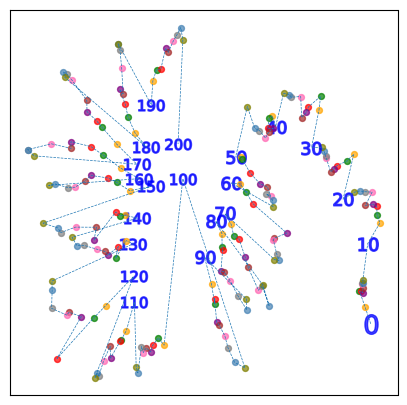

In [72]:
TENSOR_FILE = 'Phi3.5-4b.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = False
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 110
RANDOM_STATE = 44
plot_func(
    TENSOR_FILE, 
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)
          


## llama3.1-8b

loading llama3.1-8b.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
Model: llama3.1-8b.nocontext_single
Layer: 1
Orderness: 0.9125
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.9125
Orderness after dimension reduction: 0.915


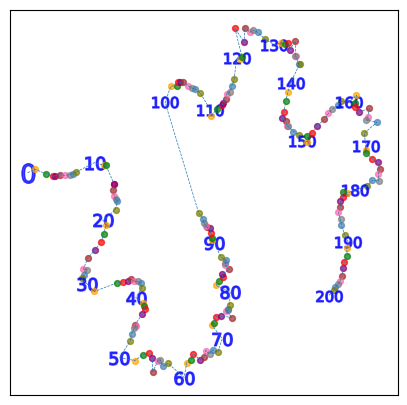

In [86]:
TENSOR_FILE = 'llama3.1-8b.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = False
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 120
RANDOM_STATE = 42
plot_func(
    TENSOR_FILE,
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)

## mistral-7B.nocontext_single.pt

loading mistral-7B.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
Model: mistral-7B.nocontext_single
Layer: 3
Orderness: 0.83
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.83
Orderness after dimension reduction: 0.8425


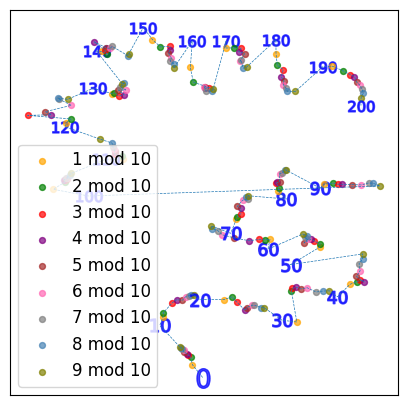

In [96]:
TENSOR_FILE = 'mistral-7B.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = True
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 110
RANDOM_STATE = 56
plot_func(
    TENSOR_FILE,
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)

## Qwen2.5-7B.nocontext_single.pt

loading Qwen2.5-7B.nocontext_single.pt
tensor shape: (29, 201, 3584)
Emb shape: (29, 201, 3584)
Model: Qwen2.5-7B.nocontext_single
Layer: 8
Orderness: 0.6925
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.6925
Orderness after dimension reduction: 0.6975


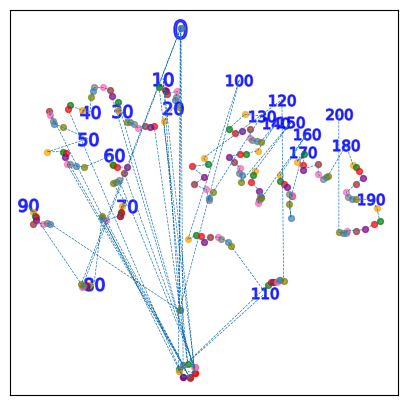

In [97]:
TENSOR_FILE = 'Qwen2.5-7B.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = False
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 80
RANDOM_STATE = 42
plot_func(
    TENSOR_FILE,
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)

## llama2-7b.nocontext_single.pt

loading llama2-7b.nocontext_single.pt
tensor shape: (33, 201, 4096)
Emb shape: (33, 201, 4096)
Model: llama2-7b.nocontext_single
Layer: 4
Orderness: 0.7325
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.7325
Orderness after dimension reduction: 0.735


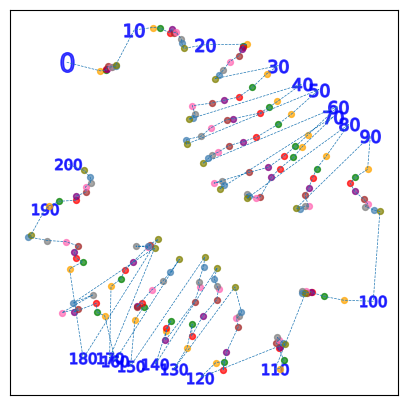

In [75]:
TENSOR_FILE = 'llama2-7b.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = False
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 110
RANDOM_STATE = 44
plot_func(
    TENSOR_FILE,
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)

## gemma2-9b.nocontext_single.pt

loading gemma2-9b.nocontext_single.pt
tensor shape: (43, 201, 3584)
Emb shape: (43, 201, 3584)
Model: gemma2-9b.nocontext_single
Layer: 5
Orderness: 0.8475
Start index: 0
End index: 201
embs length: 201
examples: [0 1 2 3 4]
Func name: TSNE
Orderness before dimension reduction: 0.8475
Orderness after dimension reduction: 0.8475


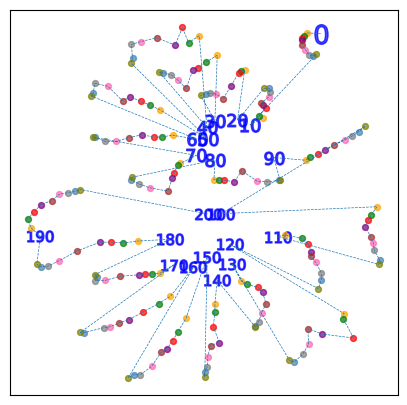

In [76]:
TENSOR_FILE = 'gemma2-9b.nocontext_single.pt'
TOKEN_METHOD = 'last'
IS_LEGNED = False
START_IDX = 0
END_IDX = 1001
PERPLEXITY = 80
RANDOM_STATE = 44
plot_func(
    TENSOR_FILE,
    start_idx=START_IDX, 
    end_idx=END_IDX, 
    perplexity=PERPLEXITY, 
    is_legned=IS_LEGNED, 
    token_method=TOKEN_METHOD,
    random_state=RANDOM_STATE,
)